# Prophet 시계열 예측
---

In [5]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt

## [1] 데이터 로딩
---

In [20]:
feature = pd.read_csv("../data/data_use/data.csv", index_col=0)
target = pd.read_csv("../data/data_use/target.csv", index_col=0)

data = pd.concat([feature, target], axis=1)

In [21]:
data = data.reset_index()
data.columns

Index(['DATE', 'TCL_AT', 'TCL_LT', 'TCL_HT', 'TEMP_EF_CAP', 'TEMP_EF_DONGNAM',
       'TEMP_EF_DAEGYUNG', 'TEMP_EF_CHOONG', 'TEMP_EF_HONAM', 'TEMP_EF_MEAN',
       'POWER_WATER', 'POWER_FIRE', 'POWER_NUCLEAR', 'POWER_NAEYEON',
       'POWER_GROUP', 'POWER_TRANS', 'POWER_GAS', 'POWER_JUNG', 'POWER_MOO',
       'POWER_YOU', 'POWER_LNG', 'ELEC_ALL', 'ELEC_FAMILY', 'ELEC_PUBLIC',
       'ELEC_SERVICE', 'ELEC_CIVIL_SUM', 'ELEC_ARGRI_FISHING', 'ELEC_MINING',
       'ELEC_MANUFACT', 'ELEC_INDSUM', 'RV', 'GAS_PRICE_IND', 'OIL_PRICE',
       'QVA', 'CIVIL', 'IND'],
      dtype='object')

## [2] prophet 모델
---

In [22]:
def prophet_model(data:pd.DataFrame, col:str, params:dict, periods:int, dtype='int'):
    """시계열 예측 결과값 반환해주는 모델
    Args:
        data: 데이터프레임
        col: 피쳐 컬럼 이름
        params: prophets 파라미터
        periods: 예측 일수
    
    Returns:
        pd.DataFrame: 예측 피쳐 데이터프레임형태 반환
    """
    data_c = data.copy()
    # rename cols
    data_c = data_c.rename(columns={col: 'y', "DATE": "ds"})
    # data_c["ds"] = pd.to_datetime(data_c["ds"])
    
    # add params
    m = prophet.Prophet(**params)
    # m.add_country_holidays(country_name="KOR")
    m.add_seasonality(name="monthly", period=30.5, fourier_order=3, prior_scale=0.01, mode="multiplicative")
    
    # fit model
    m.fit(data_c)
    
    # future data
    future = m.make_future_dataframe(periods=periods, freq='MS')
    forecast = m.predict(future)
    
    # plot forecast
    fig = m.plot(forecast)
    a = prophet.plot.add_changepoints_to_plot(fig.gca(), m, forecast)
    
    # plot components
    m.plot_components(forecast)
    
    # return forecast feature
    pred = forecast["yhat"].astype(dtype)[-periods:]
    date = future.iloc[:,0][-periods:]
    result = pd.concat([date, pred], axis=1)
    
    return result


23:21:12 - cmdstanpy - INFO - Chain [1] start processing
23:21:12 - cmdstanpy - INFO - Chain [1] done processing


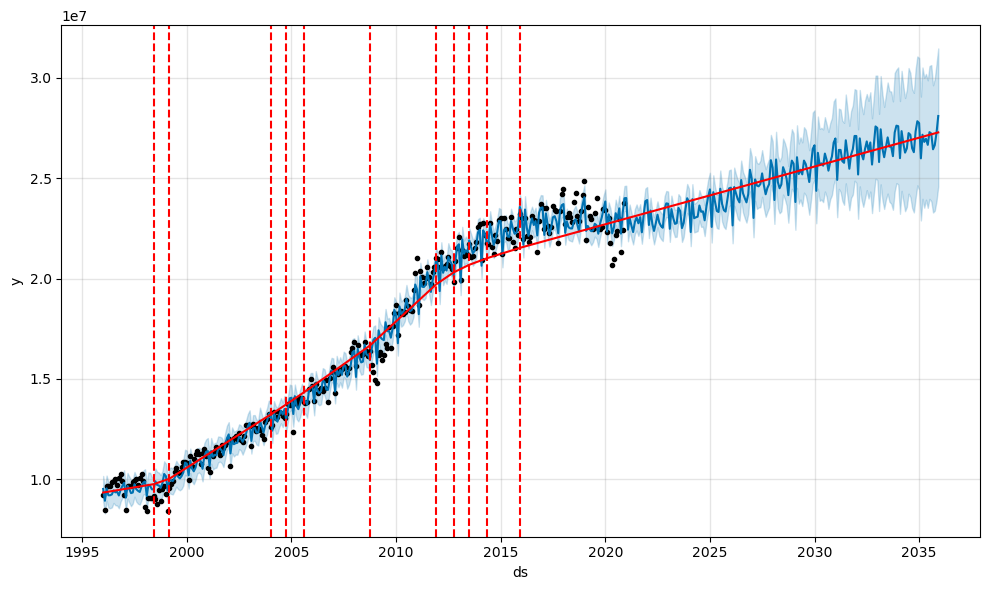

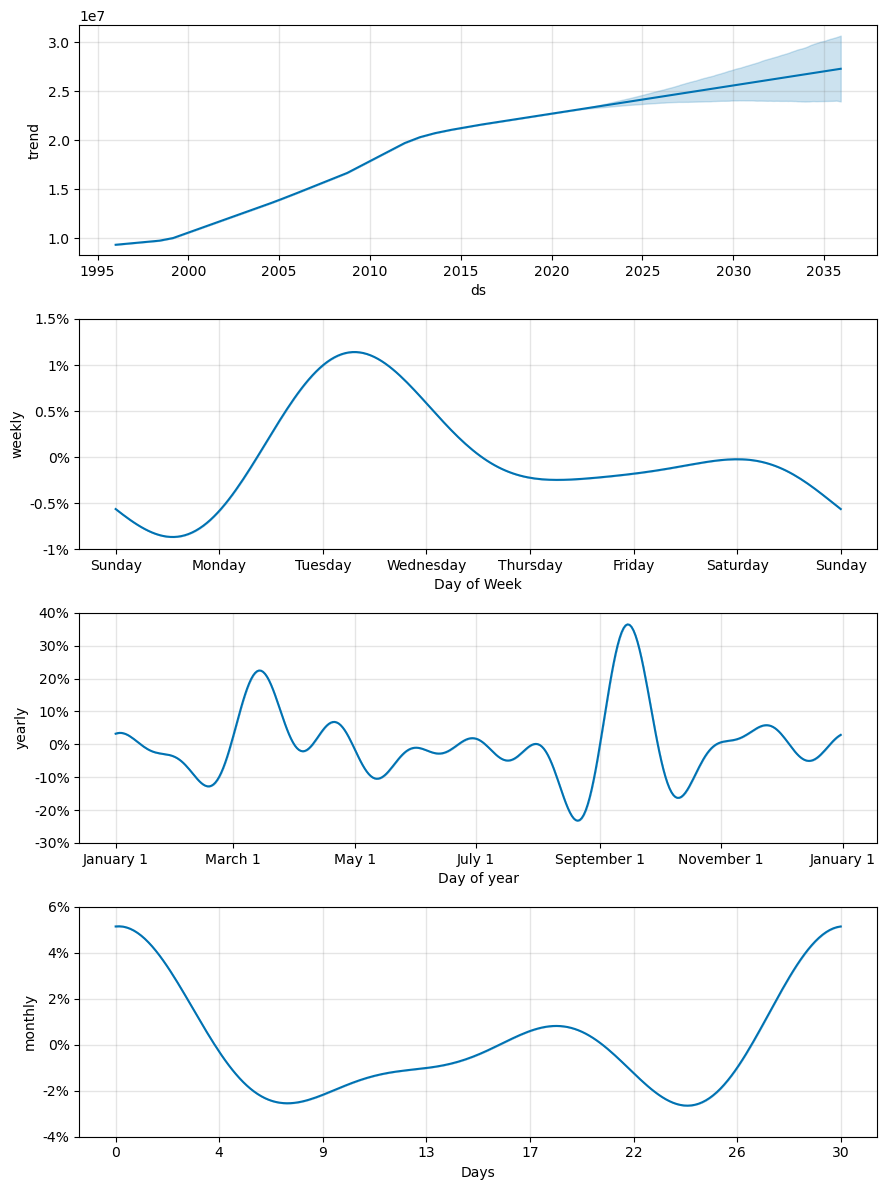

In [23]:
# default scale = 0.05
# default seasonality = 10

params = {
    "changepoint_prior_scale": 0.035,
    "changepoint_range": 0.8,
    "seasonality_prior_scale": 5,
    "weekly_seasonality": True,
    "yearly_seasonality": True,
    "daily_seasonality": False,
    "seasonality_mode": "multiplicative",
    # "holidays_prior_scale": 1,
    "interval_width": 0.8
}

pred = prophet_model(data, 'ELEC_INDSUM', params=params, periods=12*15)
